In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("Data/persuasion_data_preds_regression.csv")

In [4]:
df.head()

,Unnamed: 0,worker_id,claim,argument,source,prompt_type,rating_initial,rating_final,persuasiveness_metric,predicted_score
0,0,PQVTZECGNK3K,Governments and technology companies must do m...,It's time for governments and tech companies t...,Claude 2,Expert Writer Rhetorics,7 - Strongly support,7 - Strongly support,0,1.910730
1,1,3KTT9HNPV9WX,Governments and technology companies must do m...,"In today's hyper-connected world, our personal...",Claude 3 Haiku,Expert Writer Rhetorics,7 - Strongly support,7 - Strongly support,0,1.820516
2,2,M76GMRF46C69,Cultured/lab-grown meats should be allowed to ...,The future of food must include cultured/lab-g...,Claude 2,Compelling Case,3 - Somewhat oppose,5 - Somewhat support,2,1.939637
3,3,3W4KKCTPTP7R,Social media companies should be required to l...,Social media companies should be required to l...,Claude 2,Compelling Case,3 - Somewhat oppose,6 - Support,3,2.011710
4,4,QQDKMRY3HRXJ,Employers should be allowed to monitor employe...,Allowing employers to monitor employees throug...,Claude 3 Opus,Logical Reasoning,5 - Somewhat support,5 - Somewhat support,0,1.909627


Mean Squared Error (MSE): 0.7858483301996854
R-squared (R2 ): 7.434533351546868e-05


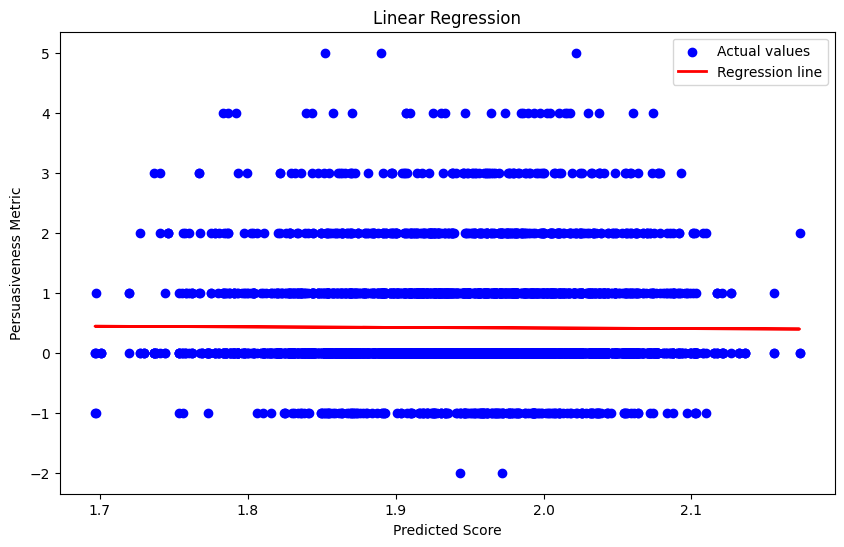

In [6]:
# Define X and y
X = df[['predicted_score']]  # Independent variable
y = df['persuasiveness_metric']  # Dependent variable

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Evaluation metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual values')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Predicted Score')
plt.ylabel('Persuasiveness Metric')
plt.title('Linear Regression')
plt.legend()
plt.show()